In [49]:
# Imports

# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import cross_validation

In [2]:
Cab_train = pd.read_csv("Kaggle_YourCabs_training.csv")
Test_cab = pd.read_csv("Kaggle_YourCabs_score.csv")
Sample_submission = pd.read_csv("Kaggle_YourCabs_sample.csv")

In [3]:
Cab_train.info()
Test_cab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43431 entries, 0 to 43430
Data columns (total 20 columns):
id                     43431 non-null int64
user_id                43431 non-null int64
vehicle_model_id       43431 non-null int64
package_id             7550 non-null float64
travel_type_id         43431 non-null int64
from_area_id           43343 non-null float64
to_area_id             34293 non-null float64
from_city_id           16345 non-null float64
to_city_id             1588 non-null float64
from_date              43431 non-null object
to_date                25541 non-null float64
online_booking         43431 non-null int64
mobile_site_booking    43431 non-null int64
booking_created        43431 non-null object
from_lat               43338 non-null float64
from_long              43338 non-null float64
to_lat                 34293 non-null float64
to_long                34293 non-null float64
Car_Cancellation       43431 non-null int64
Cost_of_error          43431 non-nu

In [4]:
#Drop the columns which has very less values from both the training and the testing tests
Cab_train = Cab_train.drop(["package_id", "from_city_id","to_city_id", "to_date",
                           "from_lat","from_long","to_lat","to_long","Cost_of_error"], axis = 1)


Test_cab = Test_cab.drop(["package_id","from_city_id","to_city_id", "to_date",
                          "from_lat","from_long","to_lat","to_long",
                          "Unnamed: 18","Unnamed: 19"], axis = 1)


In [5]:
def create_month(x):
    return x.split('/')[0]


In [6]:
def create_day(x):
    return x.split('/')[1]

In [7]:
def create_year(x):
    return x.split('/')[2]

In [8]:
Cab_train['Day_of_Journey'] = Cab_train.from_date.apply(create_day)
Cab_train['Month_of_Journey'] = Cab_train.from_date.apply(create_month)
Cab_train['YearTemp_of_Journey'] = Cab_train.from_date.apply(create_year)


Test_cab['Day_of_Journey'] = Test_cab.from_date.apply(create_day)
Test_cab['Month_of_Journey'] = Test_cab.from_date.apply(create_month)
Test_cab['YearTemp_of_Journey'] = Test_cab.from_date.apply(create_year)

Cab_train['Day_of_Booking'] = Cab_train.booking_created.apply(create_day)
Cab_train['Month_of_Booking'] = Cab_train.booking_created.apply(create_month)
Cab_train['YearTemp_of_Booking'] = Cab_train.booking_created.apply(create_year)


Test_cab['Day_of_Booking'] = Test_cab.booking_created.apply(create_day)
Test_cab['Month_of_Booking'] = Test_cab.booking_created.apply(create_month)
Test_cab['YearTemp_of_Booking'] = Test_cab.booking_created.apply(create_year)



In [9]:
Cab_train.head(1)

,id,user_id,vehicle_model_id,travel_type_id,from_area_id,to_area_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,Day_of_Journey,Month_of_Journey,YearTemp_of_Journey,Day_of_Booking,Month_of_Booking,YearTemp_of_Booking
0,132512,22177,28,2,83,448,1/1/2013 2:00,0,0,1/1/2013 1:39,0,1,1,2013 2:00,1,1,2013 1:39


In [10]:
Cab_train['Year_of_Journey']  = Cab_train['YearTemp_of_Journey'].apply(lambda x: int(str(x)[:5]))
Test_cab['Year_of_Journey'] = Test_cab['YearTemp_of_Journey'].apply(lambda x: int(str(x)[:5]))

Cab_train['Year_of_Booking']  = Cab_train['YearTemp_of_Booking'].apply(lambda x: int(str(x)[:5]))
Test_cab['Year_of_Booking'] = Test_cab['YearTemp_of_Booking'].apply(lambda x: int(str(x)[:5]))


In [11]:
Cab_train.head(1)

,id,user_id,vehicle_model_id,travel_type_id,from_area_id,to_area_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,Day_of_Journey,Month_of_Journey,YearTemp_of_Journey,Day_of_Booking,Month_of_Booking,YearTemp_of_Booking,Year_of_Journey,Year_of_Booking
0,132512,22177,28,2,83,448,1/1/2013 2:00,0,0,1/1/2013 1:39,0,1,1,2013 2:00,1,1,2013 1:39,2013,2013


In [12]:
#drop the temp year column
Cab_train.drop("YearTemp_of_Journey", axis=1, inplace=True)
Cab_train.drop("YearTemp_of_Booking", axis=1, inplace=True)

Test_cab.drop("YearTemp_of_Journey", axis=1, inplace=True)
Test_cab.drop("YearTemp_of_Booking", axis=1, inplace=True)

In [13]:
#drop the booking created date and from date column
Cab_train.drop("from_date", axis = 1, inplace = True)
Test_cab.drop("from_date", axis = 1, inplace = True)

#booking created 
Cab_train.drop("booking_created", axis = 1, inplace = True)
Test_cab.drop("booking_created", axis = 1, inplace = True)

In [14]:
Cab_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43431 entries, 0 to 43430
Data columns (total 15 columns):
id                     43431 non-null int64
user_id                43431 non-null int64
vehicle_model_id       43431 non-null int64
travel_type_id         43431 non-null int64
from_area_id           43343 non-null float64
to_area_id             34293 non-null float64
online_booking         43431 non-null int64
mobile_site_booking    43431 non-null int64
Car_Cancellation       43431 non-null int64
Day_of_Journey         43431 non-null object
Month_of_Journey       43431 non-null object
Day_of_Booking         43431 non-null object
Month_of_Booking       43431 non-null object
Year_of_Journey        43431 non-null int64
Year_of_Booking        43431 non-null int64
dtypes: float64(2), int64(9), object(4)
memory usage: 5.3+ MB


In [15]:
Test_cab.head(1)

,id,user_id,vehicle_model_id,travel_type_id,from_area_id,to_area_id,online_booking,mobile_site_booking,Day_of_Journey,Month_of_Journey,Day_of_Booking,Month_of_Booking,Year_of_Journey,Year_of_Booking
0,132516,22179,12,2,1096,393,0,0,1,1,1,1,2013,2013


In [16]:
Cab_train.corr('spearman')

,id,user_id,vehicle_model_id,travel_type_id,from_area_id,to_area_id,online_booking,mobile_site_booking,Car_Cancellation,Year_of_Journey,Year_of_Booking
id,1.000000,0.685588,0.035850,0.006211,0.023385,0.024713,0.106480,0.088576,0.134487,0.013699,NaN
user_id,0.685588,1.000000,0.058515,-0.034468,0.018813,0.011489,0.103174,0.063390,0.110619,0.012772,NaN
vehicle_model_id,0.035850,0.058515,1.000000,-0.037089,-0.022952,-0.042718,0.013878,-0.011320,-0.061483,-0.004842,NaN
travel_type_id,0.006211,-0.034468,-0.037089,1.000000,0.018280,-0.005288,-0.070009,-0.025123,-0.026864,-0.008380,NaN
from_area_id,0.023385,0.018813,-0.022952,0.018280,1.000000,0.012092,0.018753,-0.010970,0.008785,0.000935,NaN
to_area_id,0.024713,0.011489,-0.042718,-0.005288,0.012092,1.000000,0.010017,-0.017008,0.069150,0.001579,NaN
online_booking,0.106480,0.103174,0.013878,-0.070009,0.018753,0.010017,1.000000,-0.156546,0.149476,-0.000318,NaN
mobile_site_booking,0.088576,0.063390,-0.011320,-0.025123,-0.010970,-0.017008,-0.156546,1.000000,0.067204,-0.001767,NaN
Car_Cancellation,0.134487,0.110619,-0.061483,-0.026864,0.008785,0.069150,0.149476,0.067204,1.000000,-0.002317,NaN
Year_of_Journey,0.013699,0.012772,-0.004842,-0.008380,0.000935,0.001579,-0.000318,-0.001767,-0.002317,1.000000,NaN


Checking the linear relationship is often useful when it comes to feature selection. Features having negative can be removed as those features does not give a good impact for our predictive model

We can drop the year column as most of the values are 2013 and even the co-linear value was negative so it won't make any contribution to our predictive model


In [18]:
Cab_train.drop("Year_of_Journey", axis=1, inplace=True)
Cab_train.drop("Year_of_Booking", axis=1, inplace=True)

Test_cab.drop("Year_of_Journey", axis=1, inplace=True)
Test_cab.drop("Year_of_Booking", axis=1, inplace=True)

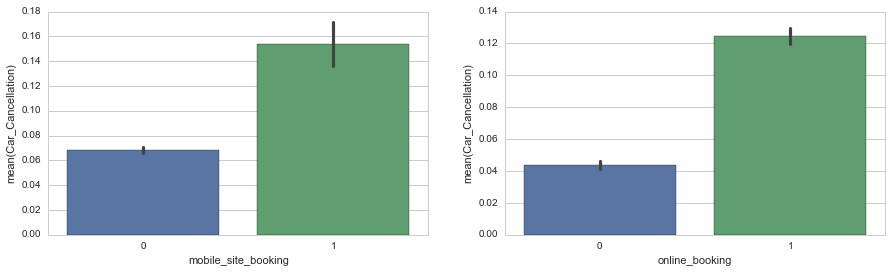

In [21]:
#Lets visualize our data now
fig,(axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x="mobile_site_booking", y="Car_Cancellation", data=Cab_train, ax=axis1)
sns.barplot(x="online_booking",  y="Car_Cancellation", data=Cab_train, ax=axis2)

In [31]:
Cab_train.drop("id", axis=1, inplace=True)

,id,user_id,vehicle_model_id,travel_type_id,from_area_id,to_area_id,online_booking,mobile_site_booking,Day_of_Journey,Month_of_Journey,Day_of_Booking,Month_of_Booking
0,132516,22179,12,2,1096,393,0,0,1,1,1,1


In [38]:
Cab_train.drop("to_area_id",axis=1,inplace=True)

In [39]:
Test_cab.drop("to_area_id",axis=1,inplace=True)

In [43]:
Cab_train["from_area_id"] = Cab_train["from_area_id"].fillna(393)
Test_cab["from_area_id"] = Test_cab["from_area_id"].fillna(393)

In [44]:
Cab_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43431 entries, 0 to 43430
Data columns (total 11 columns):
user_id                43431 non-null int64
vehicle_model_id       43431 non-null int64
travel_type_id         43431 non-null int64
from_area_id           43431 non-null float64
online_booking         43431 non-null int64
mobile_site_booking    43431 non-null int64
Car_Cancellation       43431 non-null int64
Day_of_Journey         43431 non-null object
Month_of_Journey       43431 non-null object
Day_of_Booking         43431 non-null object
Month_of_Booking       43431 non-null object
dtypes: float64(1), int64(6), object(4)
memory usage: 4.0+ MB


In [45]:
Test_cab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 11 columns):
id                     10000 non-null int64
user_id                10000 non-null int64
vehicle_model_id       10000 non-null int64
travel_type_id         10000 non-null int64
from_area_id           10000 non-null float64
online_booking         10000 non-null int64
mobile_site_booking    10000 non-null int64
Day_of_Journey         10000 non-null object
Month_of_Journey       10000 non-null object
Day_of_Booking         10000 non-null object
Month_of_Booking       10000 non-null object
dtypes: float64(1), int64(6), object(4)
memory usage: 937.5+ KB


In [46]:
#lets build the training and testing data
X_train = Cab_train.drop("Car_Cancellation",axis=1)
Y_train = Cab_train["Car_Cancellation"]
X_test = Test_cab.drop("id",axis=1)

In [47]:
# Logistic Regression

logreg = LogisticRegression()

clf = logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

logreg.score(X_train, Y_train)

0.92774746149064036

In [51]:
scores = cross_validation.cross_val_score(clf, X_train, Y_train,
                                          cv=5, scoring='roc_auc')
scores

array([ 0.491925  ,  0.52447454,  0.76292859,  0.4441509 ,  0.66641714])

In [52]:
random_forest = RandomForestClassifier(n_estimators=150)

clf = random_forest.fit(X_train, Y_train)

In [56]:
scores = cross_validation.cross_val_score(clf, X_train, Y_train,
                                          cv=5, scoring='roc_auc')
scores

array([  5.74409532e-01,   1.46615693e-01,   5.20655784e-04,
         2.22076439e-04,   6.24083883e-01])

In [54]:
Y_pred = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

0.99933227418203585

In [61]:
submission = pd.DataFrame({
        "id": Test_cab["id"],
        "Car_Cancellation": Y_pred

    })
submission.to_csv('Cancel.csv', index=False)